In [1]:
import pandas as pd
import numpy as np

In [4]:
bike=pd.read_csv('C:/Users/dustn/Desktop/bike/2020/new_ride_data_2020.csv',encoding='cp949')

In [3]:
# 메모리 줄이기
bike[['rental_code','sex','age']]=bike[['rental_code','sex','age']].astype('category')
bike[['calories','carbon','distance']]=bike[['calories','carbon','distance']].astype('float32')

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19026035 entries, 0 to 19026034
Data columns (total 10 columns):
 #   Column       Dtype   
---  ------       -----   
 0   Unnamed: 0   object  
 1   rental_code  category
 2   sex          category
 3   age          category
 4   usage        int64   
 5   calories     float32 
 6   carbon       float32 
 7   distance     float32 
 8   usage_time   int64   
 9   location     object  
dtypes: category(3), float32(3), int64(2), object(2)
memory usage: 852.8+ MB


In [5]:
bike.describe()

,usage,calories,carbon,distance,usage_time
count,1.902604e+07,1.890664e+07,1.890664e+07,1.902604e+07,1.902604e+07
mean,1.223153e+00,1.741037e+02,7.960137e-01,3.412621e+03,3.702015e+01
std,6.884705e-01,8.916506e+04,2.619231e+01,1.125440e+05,4.935308e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01
75%,1.000000e+00,4.324000e+01,3.800000e-01,1.630000e+03,4.800000e+01
max,8.900000e+01,1.000000e+08,9.175430e+03,3.954919e+07,1.581400e+04


In [4]:
bike['Unnamed: 0'] = pd.to_datetime(bike['Unnamed: 0'])
bike['hour'] = bike['Unnamed: 0'].dt.hour
bike['weekday'] = bike['Unnamed: 0'].dt.weekday
bike['day'] = bike['Unnamed: 0'].dt.day
bike['month'] = bike['Unnamed: 0'].dt.month
bike['weekend'] = bike['weekday'].isin([5,6]).astype(int)
bike['week'] = bike['Unnamed: 0'].dt.isocalendar().week

In [16]:
date_column=[]
for i in bike['Unnamed: 0']:
    date_column.append(i)
bike.index=pd.to_datetime(date_column) 

bike.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
bike

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,weekday,day,month,weekend,week
2020-01-01 00:00:00,정기권,NaN,10대,1,33.959999,0.30,1280.000000,6,1044_굽은다리역,0,2,1,1,0,1
2020-01-01 00:00:00,정기권,NaN,10대,1,40.150002,0.39,1690.000000,6,1656_중앙하이츠 아파트 입구,0,2,1,1,0,1
2020-01-01 00:00:00,정기권,NaN,10대,1,80.879997,0.50,2150.000000,12,1337_돈암성당 옆,0,2,1,1,0,1
2020-01-01 00:00:00,정기권,NaN,10대,1,47.360001,0.43,1840.000000,25,1984_구로구청,0,2,1,1,0,1
2020-01-01 00:00:00,정기권,NaN,10대,1,29.340000,0.26,1140.000000,5,2601_석촌호수 서호사거리,0,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00,일일권,M,30대,1,0.000000,0.00,0.000000,13,3121_가좌삼거리,23,3,31,12,0,53
2020-12-31 23:00:00,일일권,M,30대,1,0.000000,0.00,0.000000,52,560_비전교회 앞,23,3,31,12,0,53
2020-12-31 23:00:00,일일권,M,30대,1,18.330000,0.17,711.989990,4,1416_상봉역 3번출구,23,3,31,12,0,53
2020-12-31 23:00:00,일일권,M,50대,1,20.520000,0.15,647.859985,7,1625_상계역(4번출구),23,3,31,12,0,53


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

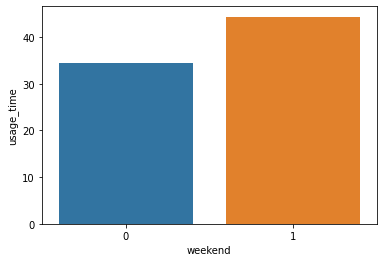

In [10]:
# 주중 주말 이용량 평균 비교
fig = plt.figure()
sns.barplot(data = bike, x= 'weekend', y = 'usage_time')
plt.show()

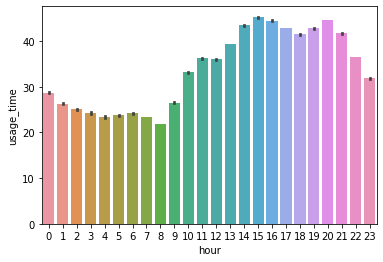

In [11]:
# 시간별 이용량 평균 비교
fig = plt.figure()
sns.barplot(data = bike, x= 'hour', y = 'usage_time')
plt.show()

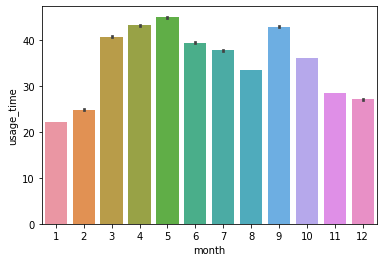

In [12]:
# 월별 이용량 평균 비교
fig = plt.figure()
sns.barplot(data = bike, x= 'month', y = 'usage_time')
plt.show()

In [7]:
from tqdm import tqdm

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

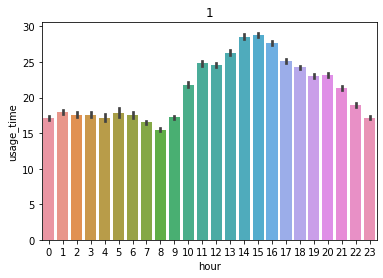

  8%|██████▉                                                                            | 1/12 [00:16<03:02, 16.57s/it]

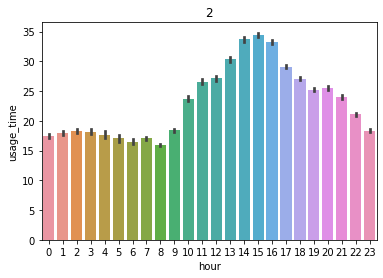

 17%|█████████████▊                                                                     | 2/12 [00:27<02:27, 14.77s/it]

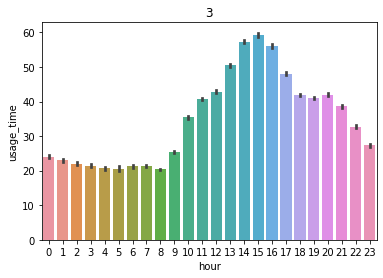

 25%|████████████████████▊                                                              | 3/12 [00:43<02:17, 15.23s/it]

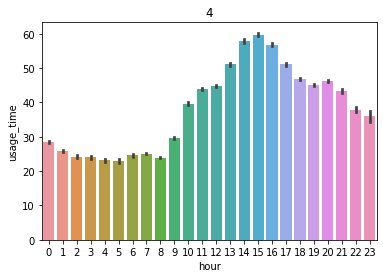

 33%|███████████████████████████▋                                                       | 4/12 [01:10<02:31, 18.90s/it]

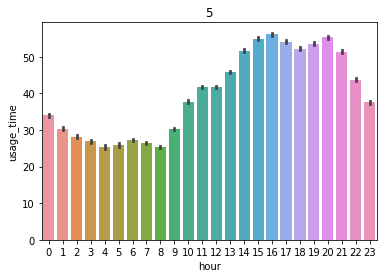

 42%|██████████████████████████████████▌                                                | 5/12 [01:39<02:32, 21.78s/it]

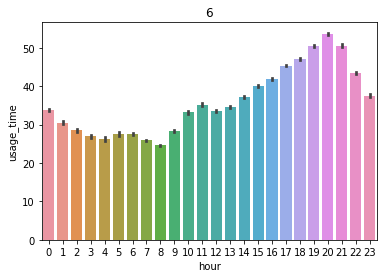

 50%|█████████████████████████████████████████▌                                         | 6/12 [02:09<02:25, 24.21s/it]

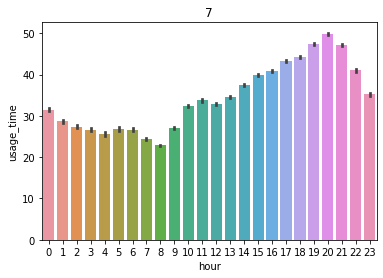

 58%|████████████████████████████████████████████████▍                                  | 7/12 [02:34<02:02, 24.50s/it]

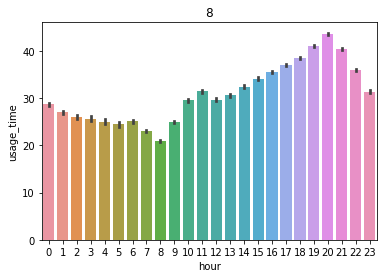

 67%|███████████████████████████████████████████████████████▎                           | 8/12 [02:50<01:27, 21.84s/it]

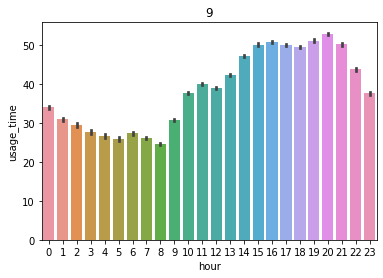

 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [03:20<01:13, 24.56s/it]

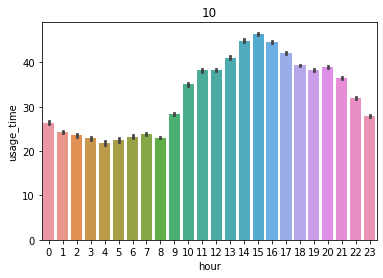

 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [03:50<00:52, 26.08s/it]

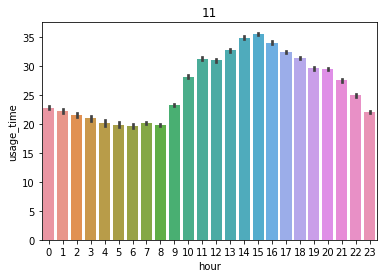

 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [04:16<00:26, 26.06s/it]

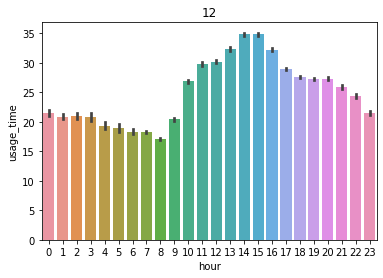

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [04:30<00:00, 22.53s/it]


In [8]:
for i in tqdm(range(1,13)):
    fig = plt.figure()
    sns.barplot(data = bike[bike['month']==i], x= 'hour', y = 'usage_time')
    plt.title(str(i))
    plt.show()

In [17]:
# 강수량 데이터 처리
rain=pd.read_csv('C:/Users/dustn/Desktop/bike/19~21 강수량데이터.csv',encoding='cp949')

In [18]:
rain=rain.fillna(0)

In [19]:
rain_date_column=[]
for i in rain['날짜']:
    rain_date_column.append(i)
rain.index=pd.to_datetime(rain_date_column) 

rain.drop(['날짜','지점'],axis=1,inplace=True)

In [20]:
rain_bike=bike.join(rain, how='left')

In [21]:
rain_bike=rain_bike.rename(columns={'강수량(mm)':'precipitation'})

In [22]:
rain_bike['precipitation']=rain_bike['precipitation'].fillna(method='ffill')

In [23]:
rain_bike

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,precipitation
2020-01-01 00:00:00,정기권,NaN,10대,1,33.96,0.30,1280.00,6,1044_굽은다리역,0.1
2020-01-01 00:00:00,정기권,NaN,10대,1,40.15,0.39,1690.00,6,1656_중앙하이츠 아파트 입구,0.1
2020-01-01 00:00:00,정기권,NaN,10대,1,80.88,0.50,2150.00,12,1337_돈암성당 옆,0.1
2020-01-01 00:00:00,정기권,NaN,10대,1,47.36,0.43,1840.00,25,1984_구로구청,0.1
2020-01-01 00:00:00,정기권,NaN,10대,1,29.34,0.26,1140.00,5,2601_석촌호수 서호사거리,0.1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00,일일권,M,30대,1,0.00,0.00,0.00,13,3121_가좌삼거리,0.0
2020-12-31 23:00:00,일일권,M,30대,1,0.00,0.00,0.00,52,560_비전교회 앞,0.0
2020-12-31 23:00:00,일일권,M,30대,1,18.33,0.17,711.99,4,1416_상봉역 3번출구,0.0
2020-12-31 23:00:00,일일권,M,50대,1,20.52,0.15,647.86,7,1625_상계역(4번출구),0.0


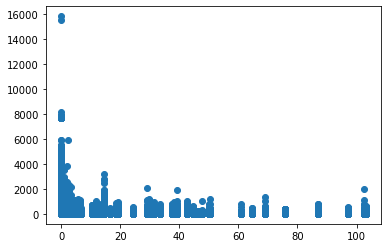

In [24]:
plt.scatter(rain_bike['precipitation'],rain_bike['usage_time'])

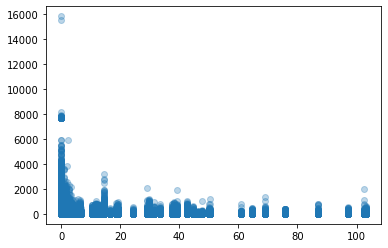

In [27]:
plt.scatter(rain_bike['precipitation'],rain_bike['usage_time'],alpha=.3)

<Figure size 432x288 with 0 Axes>

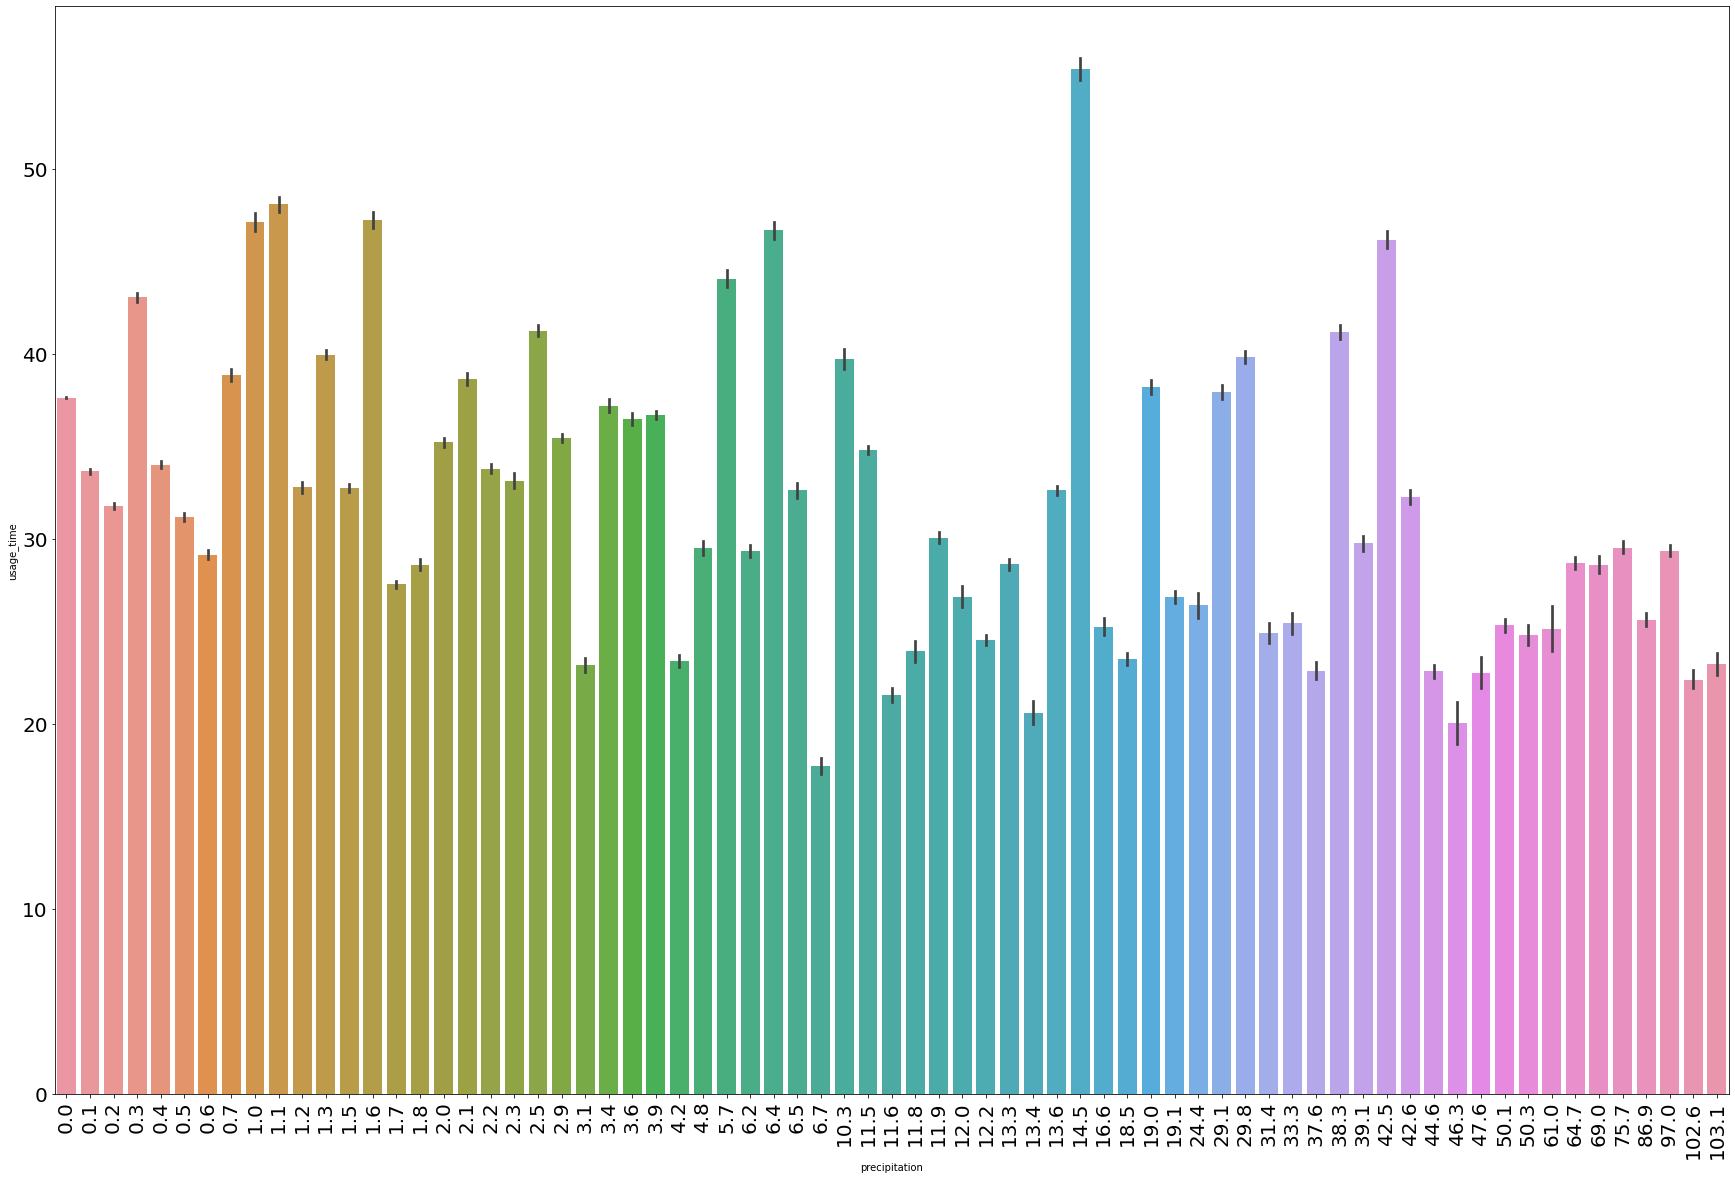

In [17]:
# 강수량별 이용량
fig = plt.figure()
plt.figure(figsize=(30,20))
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
sns.barplot(data = rain_bike, x='precipitation',y='usage_time')
plt.xticks(rotation =90)
plt.show()

In [28]:
# 기온 데이터 처리
temp=pd.read_csv('C:/Users/dustn/Desktop/bike/19~21 기온데이터.csv',encoding='cp949')

In [29]:
temp_date_column=[]
for i in temp['날짜']:
    temp_date_column.append(i)
temp.index=pd.to_datetime(temp_date_column) 

temp.drop(['날짜','지점','최저기온(℃)','최고기온(℃)'],axis=1,inplace=True)

In [30]:
merge_bike=rain_bike.join(temp, how='left')

In [31]:
merge_bike=merge_bike.rename(columns={'평균기온(℃)':'temperature'})

In [32]:
merge_bike['temperature']=merge_bike['temperature'].fillna(method='ffill')

In [33]:
merge_bike.head()

,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,precipitation,temperature
2020-01-01,정기권,NaN,10대,1,33.96,0.30,1280.0,6,1044_굽은다리역,0.1,-2.2
2020-01-01,정기권,NaN,10대,1,40.15,0.39,1690.0,6,1656_중앙하이츠 아파트 입구,0.1,-2.2
2020-01-01,정기권,NaN,10대,1,80.88,0.50,2150.0,12,1337_돈암성당 옆,0.1,-2.2
2020-01-01,정기권,NaN,10대,1,47.36,0.43,1840.0,25,1984_구로구청,0.1,-2.2
2020-01-01,정기권,NaN,10대,1,29.34,0.26,1140.0,5,2601_석촌호수 서호사거리,0.1,-2.2


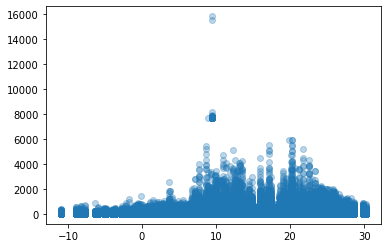

In [34]:
plt.scatter(merge_bike['temperature'],merge_bike['usage_time'],alpha=.3)

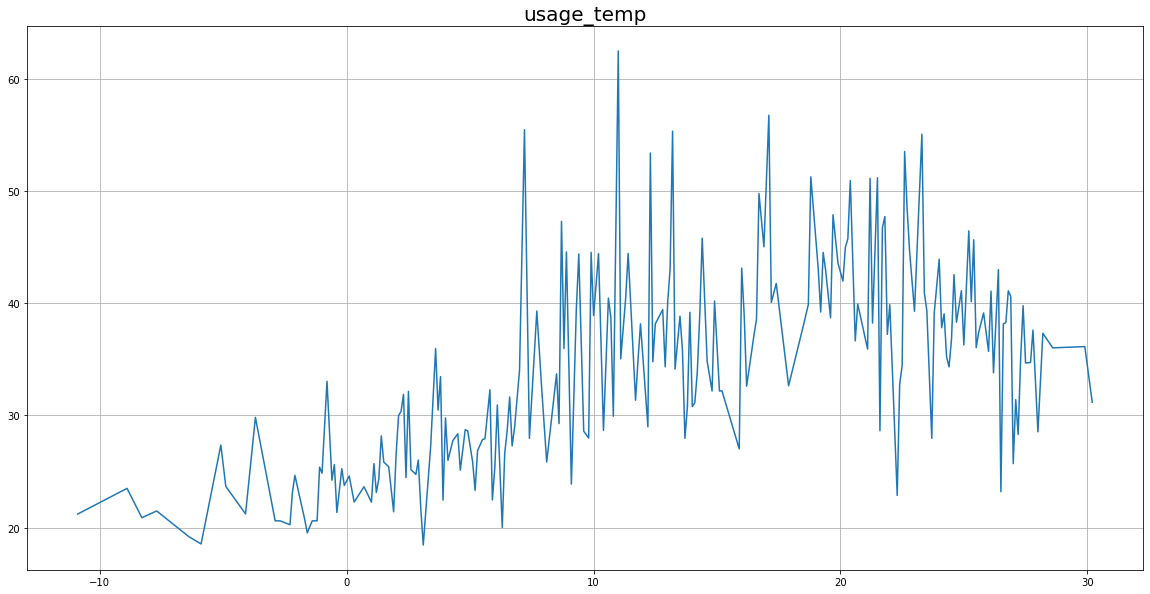

In [32]:
# 기온별 이용량
grouped=merge_bike.groupby('temperature')
usage_time=grouped['usage_time'].mean()
fig = plt.figure(figsize=(20,10)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성
plt.title('usage_temp',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()

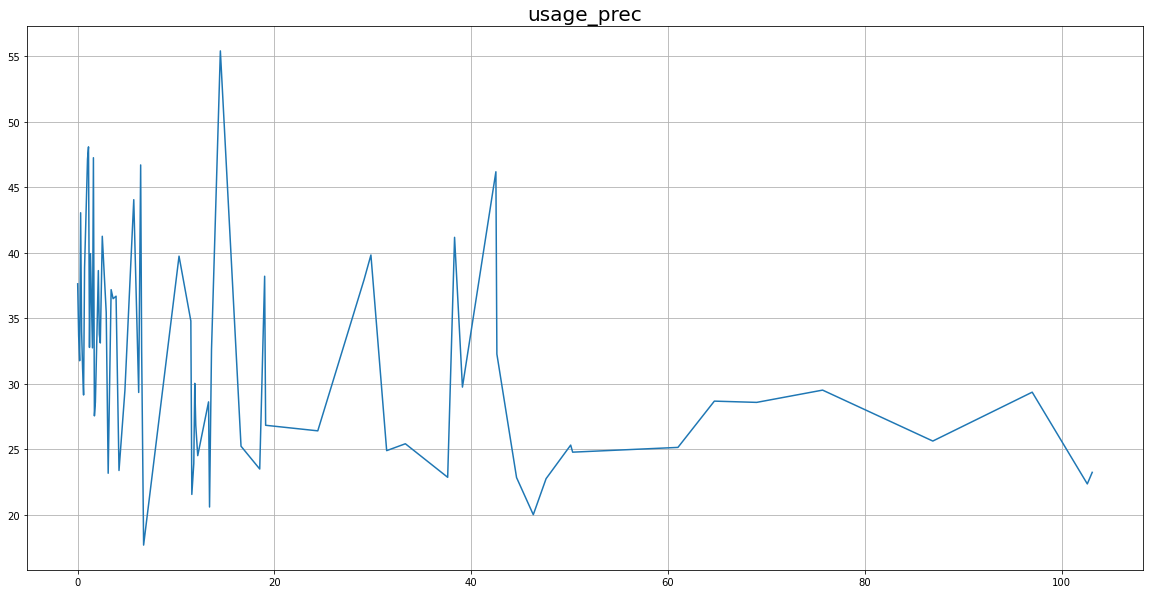

In [33]:
# 강수량별 이용량
grouped=merge_bike.groupby('precipitation')
usage_time=grouped['usage_time'].mean()
fig = plt.figure(figsize=(20,10)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성
plt.title('usage_prec',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()

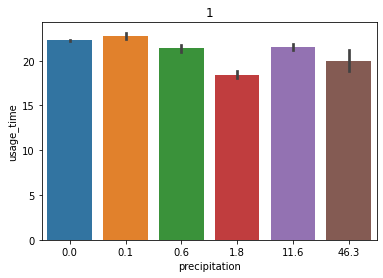

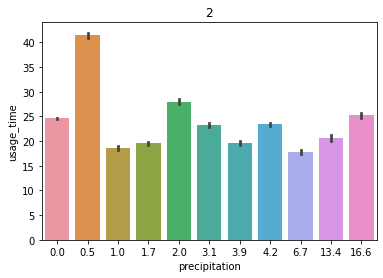

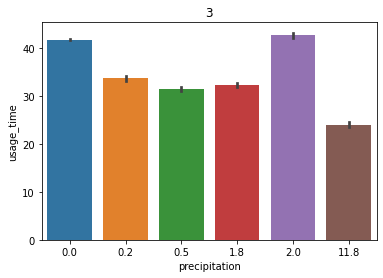

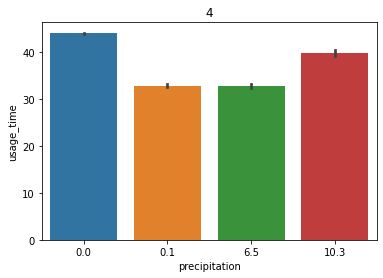

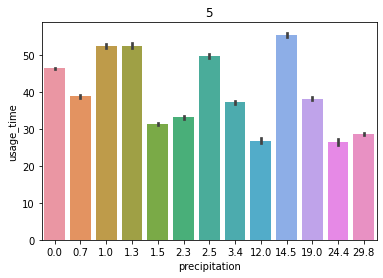

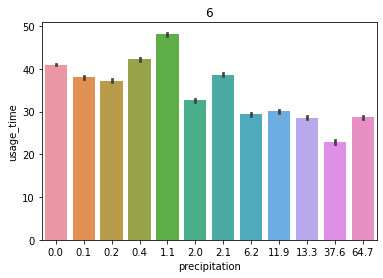

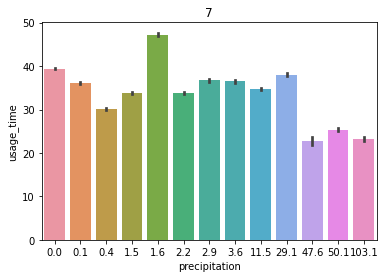

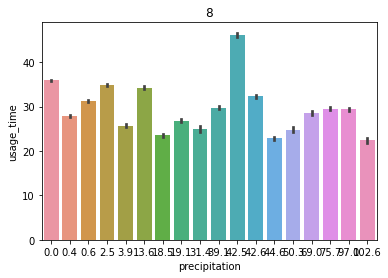

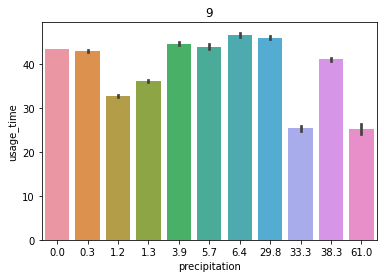

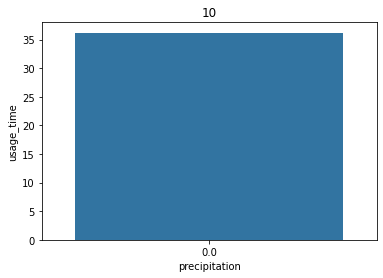

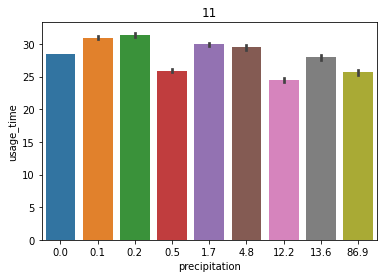

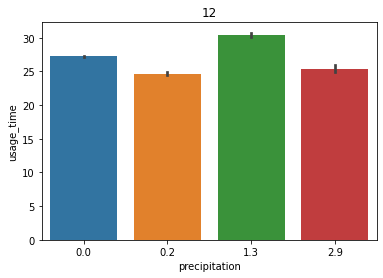

In [26]:
for i in range(1,13):
    fig = plt.figure()
    sns.barplot(data = merge_bike[merge_bike['month']==i], x= 'precipitation', y = 'usage_time')
    plt.title(str(i))
    plt.show()

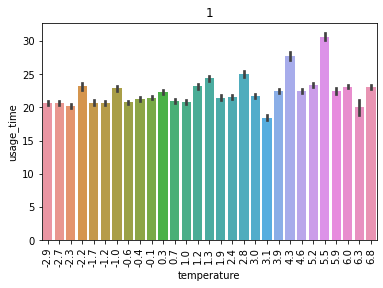

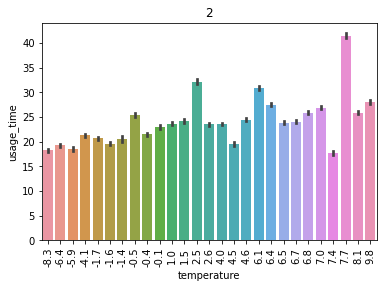

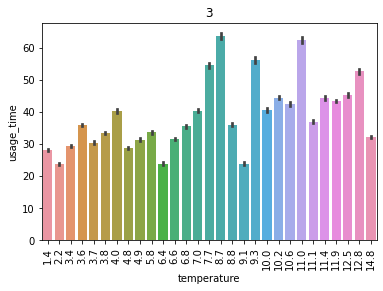

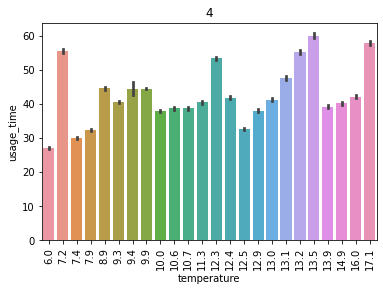

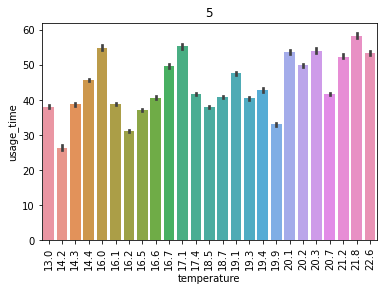

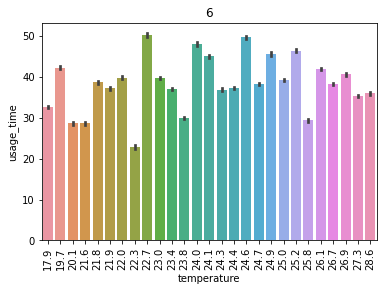

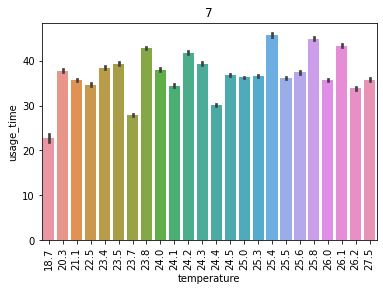

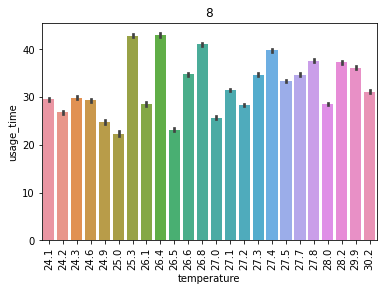

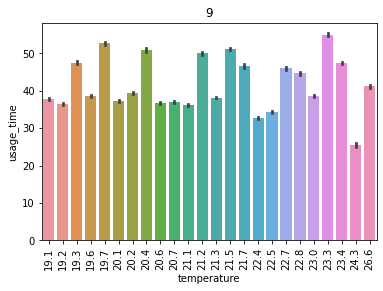

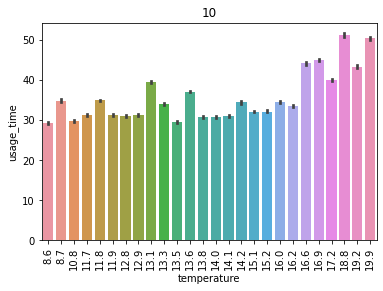

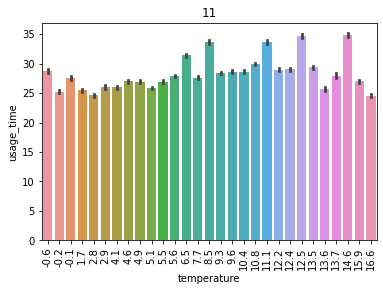

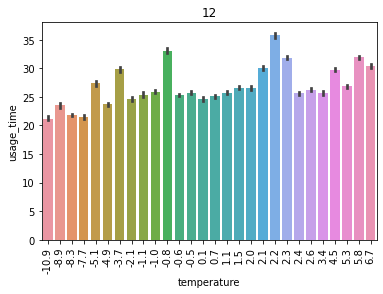

In [28]:
for i in range(1,13):
    fig = plt.figure()
    sns.barplot(data = merge_bike[merge_bike['month']==i], x= 'temperature', y = 'usage_time')
    plt.xticks(rotation =90)
    plt.title(str(i))
    plt.show()

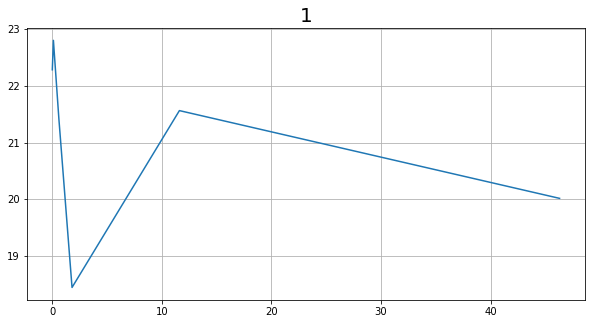

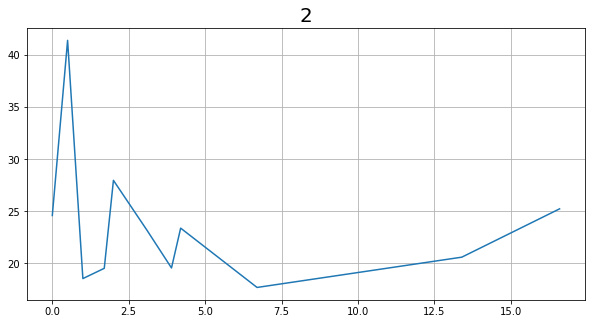

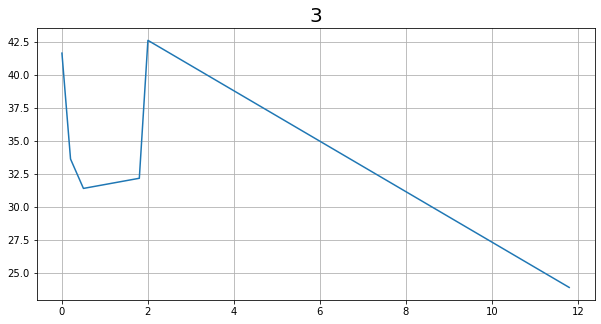

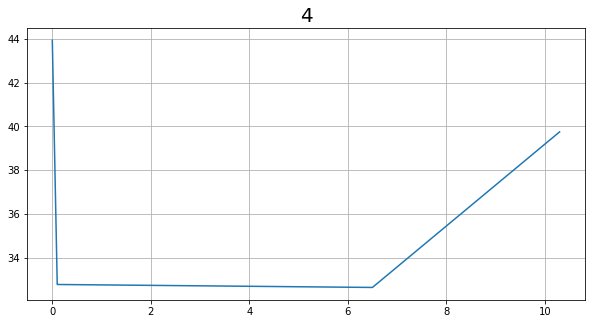

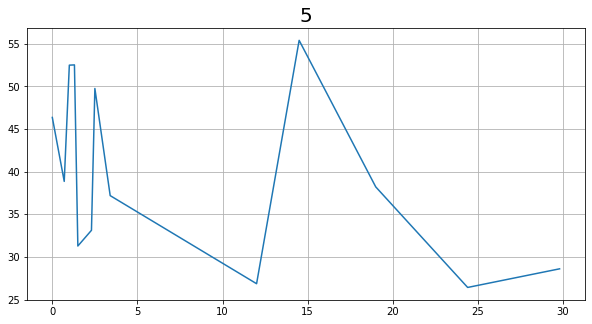

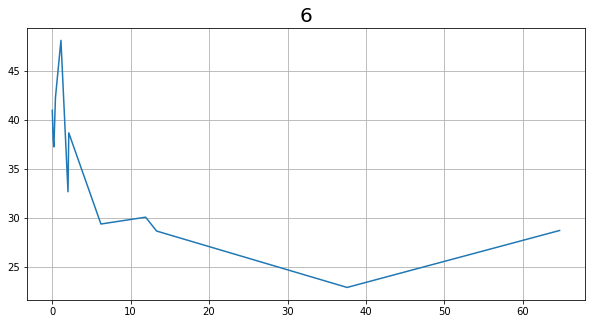

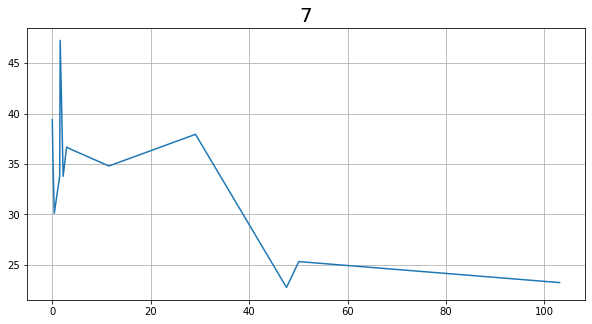

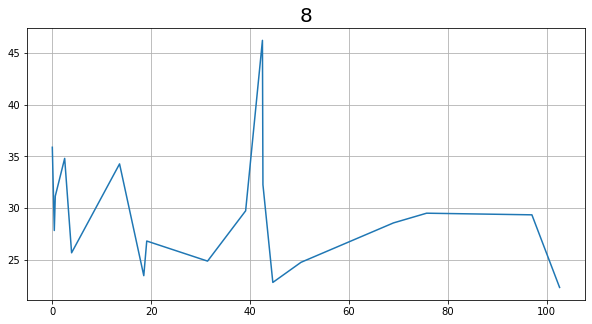

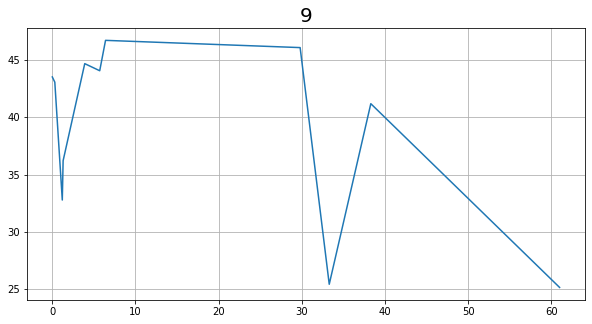

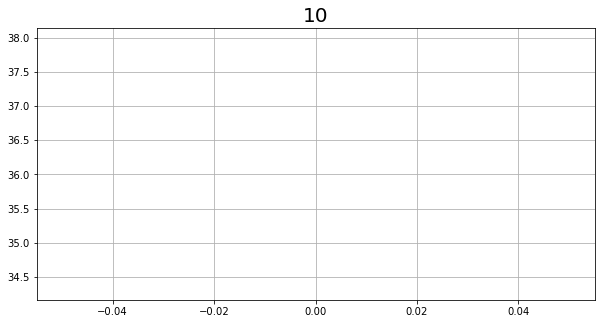

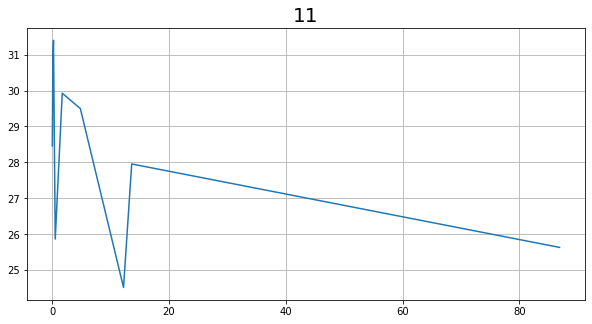

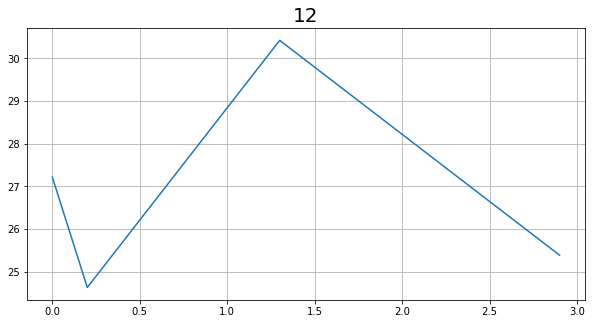

In [34]:
for i in range(1,13):
    grouped=merge_bike[merge_bike['month']==i].groupby('precipitation')
    usage_time=grouped['usage_time'].mean()
    fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
    ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

    ax.plot(usage_time) ## 선그래프 생성
    plt.title(str(i),fontsize=20) ##
    plt.grid(True)
    plt.show()    

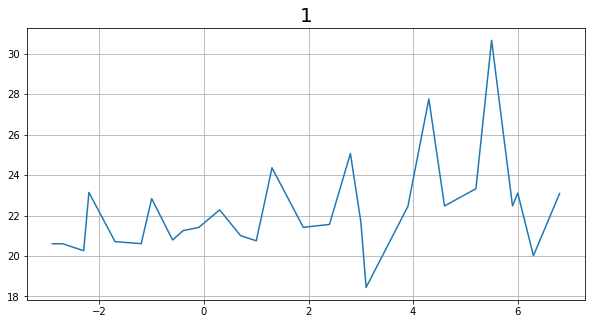

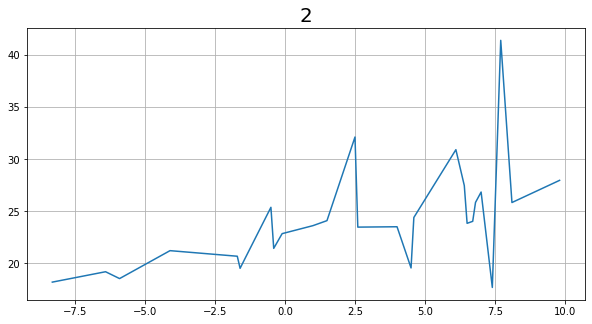

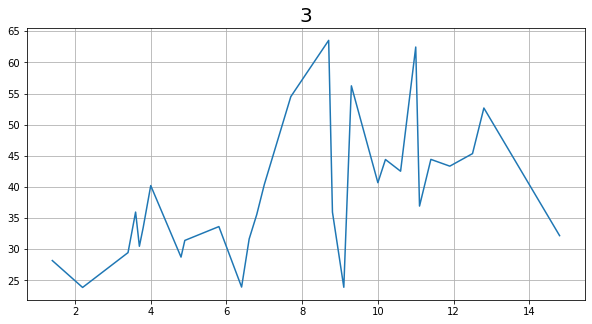

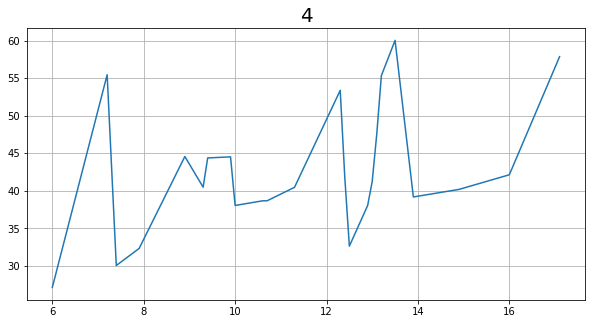

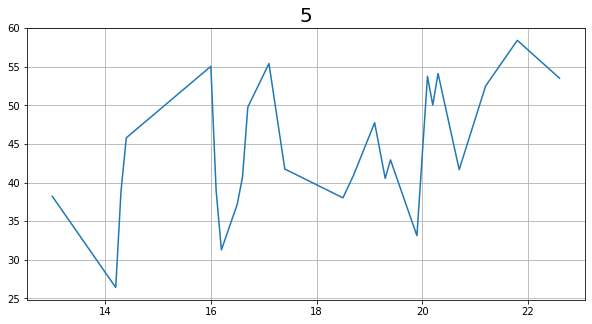

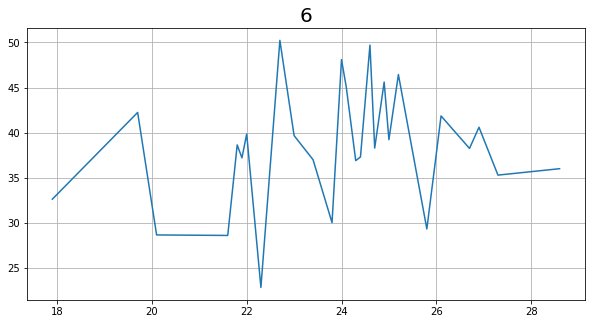

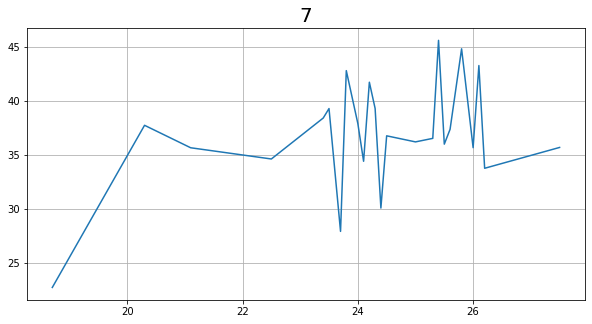

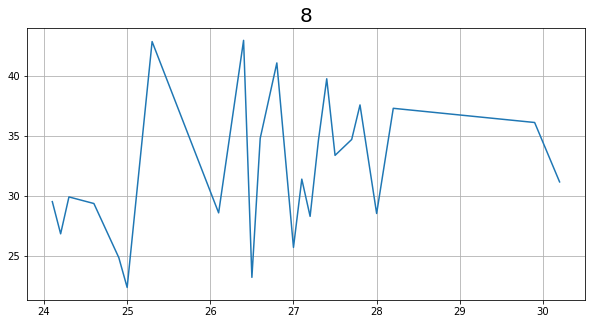

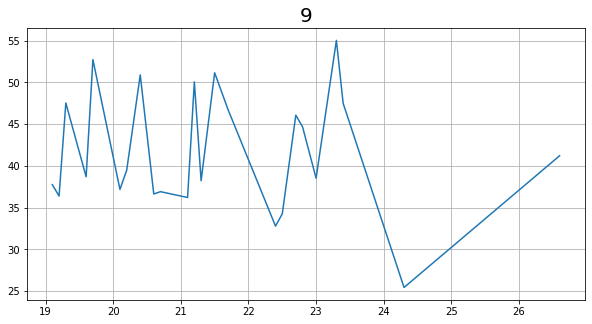

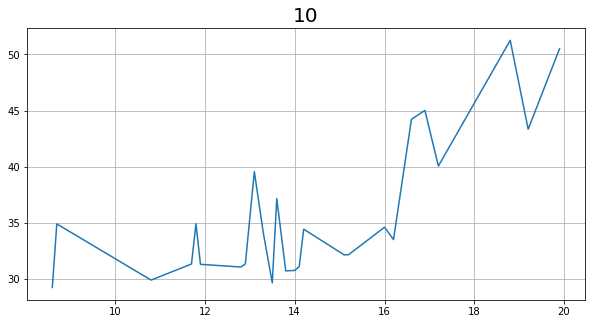

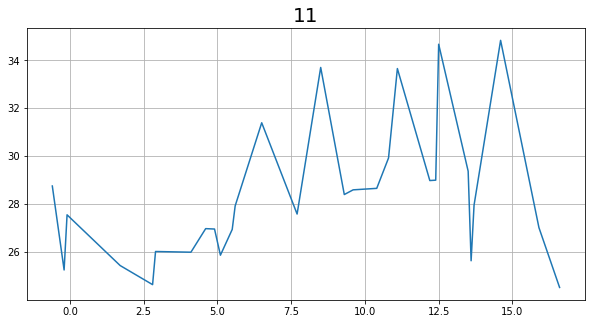

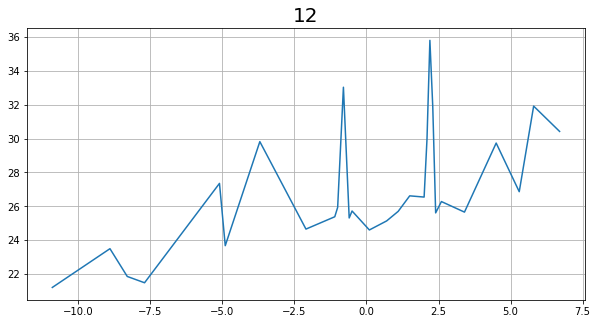

In [35]:
for i in range(1,13):
    grouped=merge_bike[merge_bike['month']==i].groupby('temperature')
    usage_time=grouped['usage_time'].mean()
    fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
    ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

    ax.plot(usage_time) ## 선그래프 생성
    plt.title(str(i),fontsize=20) ## 타이틀 설정
    plt.grid(True)
    plt.show()   

In [81]:
def standard(x):
    return (x-np.mean(x))/np.std(x)

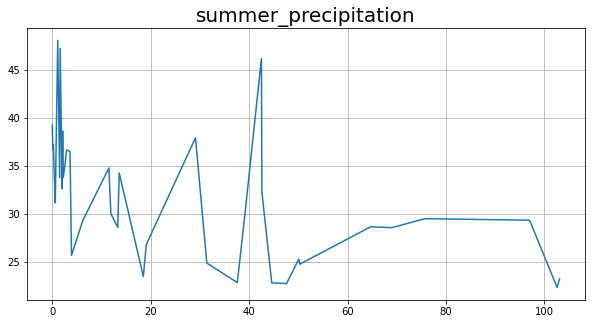

In [59]:
grouped=merge_bike[merge_bike['month'].isin([6,7,8])].groupby('precipitation')
usage_time=grouped['usage_time'].mean()

fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성

plt.title('summer_precipitation',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()   

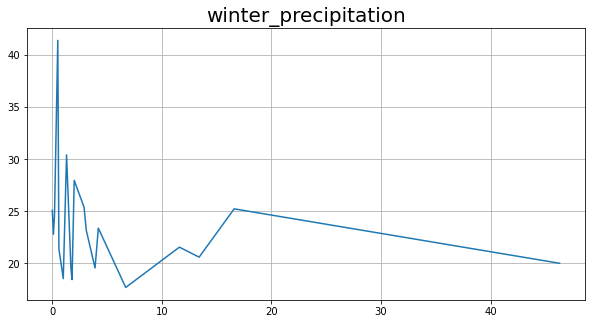

In [60]:
grouped2=merge_bike[merge_bike['month'].isin([12,1,2])].groupby('precipitation')
usage_time2=grouped2['usage_time'].mean()
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time2)
plt.title('winter_precipitation',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()   

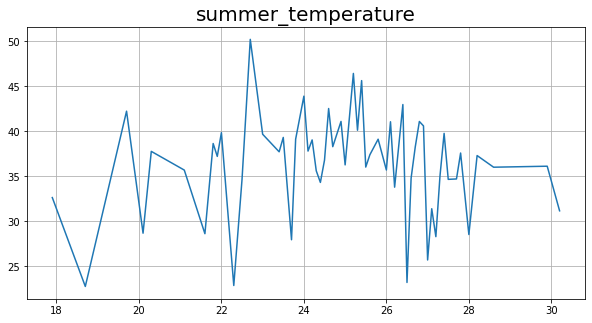

In [57]:
grouped=merge_bike[merge_bike['month'].isin([6,7,8])].groupby('temperature')
usage_time=grouped['usage_time'].mean()

fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time) ## 선그래프 생성

plt.title('summer_temperature',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()   

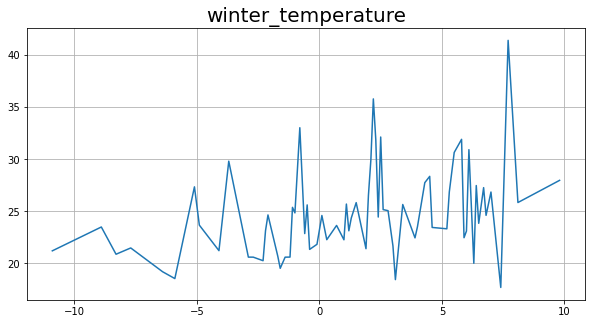

In [58]:
grouped2=merge_bike[merge_bike['month'].isin([12,1,2])].groupby('temperature')
usage_time2=grouped2['usage_time'].mean()
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(usage_time2)
plt.title('winter_temperature',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.show()   

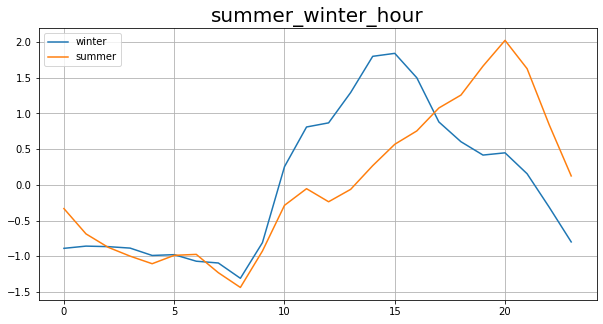

In [80]:
grouped=merge_bike[merge_bike['month'].isin([6,7,8])].groupby('hour')
usage_time=grouped['usage_time'].mean()
grouped2=merge_bike[merge_bike['month'].isin([12,1,2])].groupby('hour')
usage_time2=grouped2['usage_time'].mean()
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(standard(usage_time2),label='winter') # standard 필수
ax.plot(standard(usage_time),label='summer')
plt.title('summer_winter_hour',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.legend()
plt.show()   

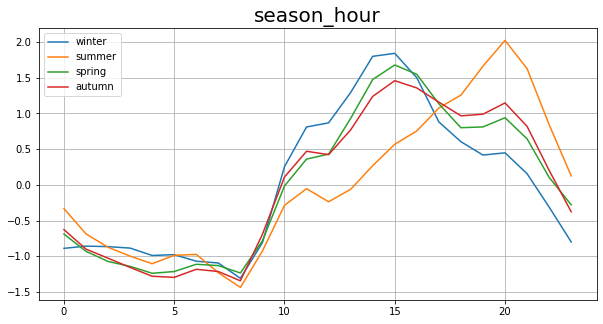

In [87]:
grouped=merge_bike[merge_bike['month'].isin([6,7,8])].groupby('hour')
usage_time=grouped['usage_time'].mean()
grouped2=merge_bike[merge_bike['month'].isin([12,1,2])].groupby('hour')
usage_time2=grouped2['usage_time'].mean()
grouped3=merge_bike[merge_bike['month'].isin([3,4,5])].groupby('hour')
usage_time3=grouped3['usage_time'].mean()
grouped4=merge_bike[merge_bike['month'].isin([9,10,11])].groupby('hour')
usage_time4=grouped4['usage_time'].mean()
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(standard(usage_time2),label='winter') # standard 필수
ax.plot(standard(usage_time),label='summer')
ax.plot(standard(usage_time3),label='spring') # standard 필수
ax.plot(standard(usage_time4),label='autumn')
plt.title('season_hour',fontsize=20) ## 타이틀 설정
plt.grid(True)
plt.legend()
plt.show() 